<a href="https://colab.research.google.com/github/GZabalaG/AIMaster/blob/main/Not_Supervised/N0_Introducci%C3%B3n%2C_m%C3%A9tricas_y_evaluaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>N0: Introducción, métricas y evaluación</h1></center>

¡Hola a tod@s y bienvenid@s al primer notebook práctico de la asignatura!

En este primer notebook veremos distintas medidas de similitud/disimilitud, así como diferentes métricas para evaluar.

Recordad que las prácticas se componen de:

<table>
  <tr style="border-width: 0px">
    <td>Notebook 1:</td>
    <td>Métodos de clustering</a>
  </tr>
  <tr style="border-width: 0px">
    <td>Notebook 2:</td>
    <td>Métodos de aprendizaje semi-supervisado</a>
  </tr>
  <tr style="border-width: 0px">
    <td>Notebook 3:</td>
    <td>Métodos de reducción de dimensionalidad</a>
  </tr>
  <tr style="border-width: 0px">
    <td>Notebook 4:</td>
    <td>Métodos de análisis de grafos y transacciones</a>
  </tr>
</table>

¡Planificaos bien y no lo dejéis todo para el final!

# Introducción

Lo que vamos a ver hoy son distintas médidas de similitud/disimilitud y evaluación, que serán las que utilicemos en las posteriores clases para implementar distintos algoritmos de clustering.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]

Vamos a definir una función que nos ayude a visualizar nuestro dataset:

In [2]:
import scipy.stats as st

def visualize_dataset(x, y, plot_centers=True):

  fig, ax = plt.subplots()
  #fig.set_size_inches(10, 10)

  # plot dataset
  ax.scatter(x, y)

  # plot dataset center
  if plot_centers:
    ds_center = [np.mean(x), np.mean(y)]
    print(f'Centro real del cluster: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
    ds_center = [2, 2]
    print(f'Centro del cluster utilizado para el ejemplo: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
    ax.scatter(ds_center[0], ds_center[1], s=200, c='b')

    # plot candidates
    c1 = np.array([ds_center[0] - 1, 3])
    c2 = np.array([ds_center[1] + 1, 3])
    ax.scatter(c1[0], c1[1], s=200, c='r')
    ax.scatter(c2[0], c2[1], s=200, c='g', marker='v')

  # Define the borders
  deltaX = (max(x) - min(x))/10
  deltaY = (max(y) - min(y))/10
  xmin = min(x) - deltaX
  xmax = max(x) + deltaX
  ymin = min(y) - deltaY
  ymax = max(y) + deltaY
  
  # Create meshgrid
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xx.ravel(), yy.ravel()])
  values = np.vstack([x, y])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)

  # create gaussian contour lines
  cfset = ax.contourf(xx, yy, f, cmap='coolwarm', alpha=0.2)
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], alpha=0.2)
  # write labels
  cset = ax.contour(xx, yy, f, colors='k', linestyles='dotted')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.title('2D Gaussian Kernel density estimation')

# Medidas de similitud/disimilitud

Vamos a crear un dataset artificial para comprobar las distintas medidas de similitud/disimilitud vistas en clase.

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


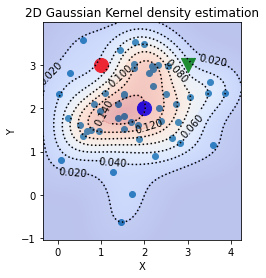

In [3]:
# para hacer los experimentos reproducibles
np.random.seed(42)

n_data_points = 50
center = np.array([2, 2])
data_var_1 = np.random.randn(n_data_points) + center[0]
data_var_2 = np.random.randn(n_data_points) + center[0]

# establecemos nuestros candidatos de prueba
ds_center = [2, 2]
c1 = np.array([ds_center[0] - 1, 3])
c2 = np.array([ds_center[1] + 1, 3])

# visualize dataset
visualize_dataset(data_var_1, data_var_2)

Vamos ahora a calcular la distancia entre nuestras dos muestras (círculo rojo y triángulo verde) con respecto al centroide del cluster.

###Vamos a empezar con la distancia Euclidiana:

<img src="https://slideplayer.es/slide/2316630/8/images/9/Espacio+bidimensional.jpg" height="300px">

In [17]:
def distancia_euclidiana(x, y):
    return dist_ec = np.sqrt(sum((dim1-dim2)**2 for dim1, dim2 in zip(x,y)))

dist_euclidiana_c1 = distancia_euclidiana(c1, ds_center)
print(f'Distancia euclidiana del círculo rojo al centro del cluster = {dist_euclidiana_c1}')

dist_euclidiana_c2 = distancia_euclidiana(c2, ds_center)
print(f'Distancia euclidiana  del triángulo verde al centro del cluster = {dist_euclidiana_c2}')

Distancia euclidiana del círculo rojo al centro del cluster = 1.4142135623730951
Distancia euclidiana  del triángulo verde al centro del cluster = 1.4142135623730951


Vamos a ver ahora la distancia Manhattan, definida como la suma del valor absoluto de las diferencias por dimension.

In [14]:
def distancia_manhattan(x, y):
    return dist_man = sum(abs(dim1-dim2) for dim1, dim2 in zip(x,y))

dist_manhattan_c1 = distancia_manhattan(c1, ds_center)
print(f'Distancia Manhattan del círculo rojo al centro del cluster = {dist_manhattan_c1}')

dist_manhattan_c2 = distancia_manhattan(c2, ds_center)
print(f'Distancia Manhattan del triángulo verde al centro del cluster = {dist_manhattan_c2}')

Distancia Manhattan del círculo rojo al centro del cluster = 2
Distancia Manhattan del triángulo verde al centro del cluster = 2


### La p-norma

Fijaos que tanto el caso de la distancia Euclídea como el de la distancia Manhattan son casos concretos de la p-norma, con p=1 para Manhattan, y p=2 para Euclídea:

<img src="https://people.math.osu.edu/fiedorowicz.1/math655/pnorms.gif" height="400px">

Vamos a implementar esta generalización y a comprobar que efectivamente es así:

In [20]:
def p_norma(x, y, p):
    return (sum((abs(dim1-dim2))**p for dim1, dim2 in zip(x,y)))**(1/p)

p_norms = [1, 2, 3, 4, 5, 100, 1000]
for i in p_norms:
    dist_c1 = p_norma(c1, center, i)
    print(f'Distancia usando la p-norma={i} del círculo rojo al centro del cluster = {dist_c1}')
    dist_c2 = p_norma(c2, center, i)
    print(f'Distancia usando la p-norma={i} del triángulo verde al centro del cluster = {dist_c2}')
    print()

Distancia usando la p-norma=1 del círculo rojo al centro del cluster = 2.0
Distancia usando la p-norma=1 del triángulo verde al centro del cluster = 2.0

Distancia usando la p-norma=2 del círculo rojo al centro del cluster = 1.4142135623730951
Distancia usando la p-norma=2 del triángulo verde al centro del cluster = 1.4142135623730951

Distancia usando la p-norma=3 del círculo rojo al centro del cluster = 1.2599210498948732
Distancia usando la p-norma=3 del triángulo verde al centro del cluster = 1.2599210498948732

Distancia usando la p-norma=4 del círculo rojo al centro del cluster = 1.189207115002721
Distancia usando la p-norma=4 del triángulo verde al centro del cluster = 1.189207115002721

Distancia usando la p-norma=5 del círculo rojo al centro del cluster = 1.148698354997035
Distancia usando la p-norma=5 del triángulo verde al centro del cluster = 1.148698354997035

Distancia usando la p-norma=100 del círculo rojo al centro del cluster = 1.0069555500567189
Distancia usando la p-

### Datasets con variables dependientes

Vamos a ver ahora lo mismo, pero usando un dataset ligeramente diferente:

Centro real del cluster: x=1.77, y=1.79
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


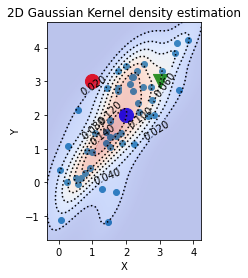

In [21]:
# para hacer los experimentos reproducibles
np.random.seed(42)

n_data_points = 50
data_var_1b = np.random.randn(n_data_points) + center[0]
data_var_2b = data_var_1b + np.random.randn(n_data_points)

# establecemos nuestros candidatos de prueba
ds_center_b = [2, 2]
c1 = np.array([ds_center_b[0] - 1, 3])
c2 = np.array([ds_center_b[1] + 1, 3])

# visualize dataset
visualize_dataset(data_var_1b, data_var_2b)

Fijaos que en este caso, nuestro dataset tiene una marcada correlación positiva entre la variable 1 y la 2. Es decir, conforme aumenta la variable 1, aumenta también la variable 2. Si revisáis el ejemplo del dataset anterior os daréis cuenta de que en ese caso, las variables no presentaban esta correlación.

Pero mejor lo comprobamos, ¿no?

### La covarianza

Para ello necesitamos hacer uso del concepto de covarianza, que se define como:

$Covarianza = \frac{\sum \left ( X_i - X_{\mu} \right )\left ( Y_i - Y_{\mu} \right )}{n-1}$

Donde $X_{\mu}$ es la media de la variable $X$, e $Y_{\mu}$ es la media de la variable $Y$.

Para los que no lo recordéis, **la covarianza se encarga de medir cuanto varía una variable con respecto a otra**. Así, un valor más elevado de la covarianza indica una mayor dependencia entre las variables, mientras que valor próximo a 0 indica que las variables son independientes.

Vamos a implementarla:

In [64]:
# función que calcula la covarianza entre dos variables
def cov(x, y):
    num_samples = x.shape[0]
    x_centered = x - np.mean(x)
    y_centered = y - np.mean(y)
    # P4
    cov = np.sum(x_centered * y_centered) / (num_samples - 1)
    return cov

cov(data_var_1, data_var_2)

0.08985489458598507

In [65]:
print(f'covarianza(data_var_1, data_var_2)={cov(data_var_1, data_var_2):.4f}')
print(f'covarianza(data_var_1b, data_var_2b)={cov(data_var_1b, data_var_2b):.4f}')

covarianza(data_var_1, data_var_2)=0.0899
covarianza(data_var_1b, data_var_2b)=0.9616


Vamos a asegurarnos de que nuestra función covarianza está bien implementada. Para ello, vamos a usar una función implementada en `numpy` llamada `cov`, que nos devuelve la **matriz de covarianzas**, que no es otra cosa que una matriz `2x2` con las covarianzas entre las variables que le introducimos:

`np.cov(x, y)` $=\begin{bmatrix}
cov(x, x) & cov(x, y) \\ 
cov(y, x) & cov(y, y)
\end{bmatrix}$

Con lo cual, los valores de nuestra función `cov` y los de la diagonal inversa de la de `numpy` deberían coincidir. Veamoslo:

In [66]:
print('Covarianza entre data_var_1 y data_var_2 calculada con numpy:\n')
print(np.cov(data_var_1, data_var_2), '\n')
print('Covarianza entre data_var_1b y data_var_2b calculada con numpy:\n')
print(np.cov(data_var_1b, data_var_2b), '\n')

Covarianza entre data_var_1 y data_var_2 calculada con numpy:

[[0.87173739 0.08985489]
 [0.08985489 0.76444418]] 

Covarianza entre data_var_1b y data_var_2b calculada con numpy:

[[0.87173739 0.96159229]
 [0.96159229 1.81589137]] 



Sin embargo, si os fijais en el siguiente ejemplo, os daréis cuenta de que la covarianza no está acotada, por lo que es dificil de interpretar.

In [59]:
# prepare data
data1 = 20 * np.random.randn(1000) + 100
data2 = data1 + (10 * np.random.randn(1000) + 50)
# calculate covariance matrix
print(f'Covarianza dataset de prueba = {cov(data1, data2)}')

Covarianza dataset de prueba = 379.8521933724455


Si no sabemos cuál es el límite superior (o inferior) de la covarianza, cómo podemos saber cómo de dependientes son dos variables? 

### El coeficiente de correlación de Pearson

Como hemos dicho antes, la covarianza es difícil de interpretar. Por ello, Karl Pearson desarrolló el coeficiente de correlación (de Pearson), definido como:

$\text{Coeficiente de correlacion de Pearson}= \frac{\mathrm{cov(x, y)}}{S_{x}\cdot S_{y}}$

Donde $S_x$ y $S_y$ son las desviaciones estándar de $x$ e $y$.

Vamos a comprobar la diferencia con la covarianza:

In [69]:
def pearson_corr(x, y):
    # P5
    return cov(x,y)/(np.std(x)*np.std(y))

In [70]:
p_corr = pearson_corr(data_var_1, data_var_2)
print(f'Coeficiente de correlación de Pearson para data_var_1 y data_var_2 = {p_corr}')
p_corr = pearson_corr(data_var_1b, data_var_2b)
print(f'Coeficiente de correlación de Pearson para data_var_1b y data_var_2b = {p_corr}')
p_corr = pearson_corr(data1, data2)
print(f'Coeficiente de correlación de Pearson para data1 y data2 = {p_corr}')

Coeficiente de correlación de Pearson para data_var_1 y data_var_2 = 0.11231814830628628
Coeficiente de correlación de Pearson para data_var_1b y data_var_2b = 0.7798788207551831
Coeficiente de correlación de Pearson para data1 y data2 = 0.8897646878929935


Fijaos que gracias a que el Coeficiente de correlación de Pearson varía entre -1 (para variables completamente correladas negativamente) y +1 (para variables completamente correladas positivamente), pasando por 0 (para variables no correladas). Por lo tanto, facilita su interpretación.

Si queréis entender mejor la covarianza y los distintos tipos de medidas de correlación, os recomiendo esta lectura (en inglés): 

https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

Es, además, la fuente de estos ejemplos.

### Medidas de similitud/disimilitud en datasets con variables dependientes

Ahora que hemos visto que las variables de nuestro nuevo dataset (`data_var_1b` y `data_var_2b`) son dependientes la una de la otra con un elevado índice de correlación de Pearson ($0.7799$), vamos a calcular las mismas distancias que antes y a tratar de interpretarlas. 

In [71]:
print('Distancias primer dataset:\n')

dist_euclidiana_c1 = distancia_euclidiana(c1, ds_center)
print(f'Distancia euclidiana del círculo rojo al centro del cluster = {dist_euclidiana_c1}')
dist_euclidiana_c2 = distancia_euclidiana(c2, ds_center)
print(f'Distancia euclidiana  del triángulo verde al centro del cluster = {dist_euclidiana_c2}')

dist_manhattan_c1 = distancia_manhattan(c1, ds_center)
print(f'Distancia Manhattan del círculo rojo al centro del cluster = {dist_manhattan_c1}')
dist_manhattan_c2 = distancia_manhattan(c2, ds_center)
print(f'Distancia Manhattan del triángulo verde al centro del cluster = {dist_manhattan_c2}')

print()
print('Distancias segundo dataset:\n')

dist_euclidiana_c1 = distancia_euclidiana(c1, ds_center_b)
print(f'Distancia euclidiana del círculo rojo al centro del cluster = {dist_euclidiana_c1}')
dist_euclidiana_c2 = distancia_euclidiana(c2, ds_center_b)
print(f'Distancia euclidiana  del triángulo verde al centro del cluster = {dist_euclidiana_c2}')

dist_manhattan_c1 = distancia_manhattan(c1, ds_center_b)
print(f'Distancia Manhattan del círculo rojo al centro del cluster = {dist_manhattan_c1}')
dist_manhattan_c2 = distancia_manhattan(c2, ds_center_b)
print(f'Distancia Manhattan del triángulo verde al centro del cluster = {dist_manhattan_c2}')

Distancias primer dataset:

Distancia euclidiana del círculo rojo al centro del cluster = 1.4142135623730951
Distancia euclidiana  del triángulo verde al centro del cluster = 1.4142135623730951
Distancia Manhattan del círculo rojo al centro del cluster = 2
Distancia Manhattan del triángulo verde al centro del cluster = 2

Distancias segundo dataset:

Distancia euclidiana del círculo rojo al centro del cluster = 1.4142135623730951
Distancia euclidiana  del triángulo verde al centro del cluster = 1.4142135623730951
Distancia Manhattan del círculo rojo al centro del cluster = 2
Distancia Manhattan del triángulo verde al centro del cluster = 2


Fijaos que los resultados son los mismos en ambos casos. Tened en cuenta que estamos llevano a cabo una simplificación: estamos asumiendo que los centros de ambos datasets son `x=2, y=2`, cuando esto no es verdad. Pero nos permite ver mejor el concepto de distancia y cómo varía dependiendo de la distribución de nuestros datos.


Mirad las distribuciones de los dos datasets y pensad: ¿creéis que es justa esta distancia?

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00
Centro real del cluster: x=1.77, y=1.79
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


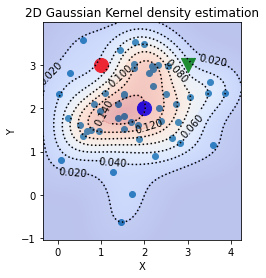

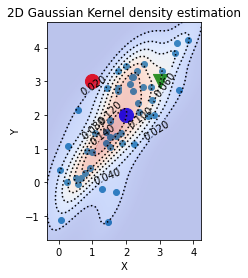

In [72]:
visualize_dataset(data_var_1, data_var_2)
visualize_dataset(data_var_1b, data_var_2b)

En el caso del primer dataset, parece justo que el círculo rojo y el triángulo verde esten a la misma distancia del centro del dataset. Pero... ¿qué opináis de que en el segundo dataset también sea así? 

Si os fijais en las líneas de contorno podéis ver como el triángulo verde está mucho más cerca del centro del dataset que el círculo rojo, y sin embargo, las distancias son exactamente iguales. ¿Cómo podemos arreglar esto?

### La distancia de Mahalanobis

Utilizando la **distancia de Mahalanobis**, que tiene en vez de ser una distancia de un punto a otro punto, es una distancia de un punto a una **distribución**, ya que hace uso de la matriz de covarianzas para centrar los datos antes de calcular la distancia. Se define así:

$d_{mahalanobis}(x, y) = \sqrt{(x-y)^T\Sigma^{-1}(x-y)}$

Aquí tenéis un muy buen recurso para entender mejor qué es la matriz de covarianza y por qué la distancia de Mahalanobis la utiliza: https://datascienceplus.com/understanding-the-covariance-matrix/.

Vamos a implementar la distancia de mahalanobis:

In [75]:
def distancia_mahalanobis(x, y, mC):
    v = x-y
    v.shape=(v.size,1)
    mCi = np.linalg.inv(mC)
    # P6
    res = np.sqrt(np.sum(v.transpose()*mCi*v))
    return res

In [76]:
print('Distancias primer dataset:\n')

dist_euclidiana_c1 = distancia_euclidiana(c1, ds_center)
print(f'Distancia euclidiana del círculo rojo al centro del cluster = {dist_euclidiana_c1:.4f}')
dist_euclidiana_c2 = distancia_euclidiana(c2, ds_center)
print(f'Distancia euclidiana  del triángulo verde al centro del cluster = {dist_euclidiana_c2:.4f}')

dist_manhattan_c1 = distancia_manhattan(c1, ds_center)
print(f'Distancia Manhattan del círculo rojo al centro del cluster = {dist_manhattan_c1:.4f}')
dist_manhattan_c2 = distancia_manhattan(c2, ds_center)
print(f'Distancia Manhattan del triángulo verde al centro del cluster = {dist_manhattan_c2:.4f}')

# calculamos primero la matriz de covarianzas
mC = np.cov(data_var_1, data_var_2)
# porque es necesaria para calcular después la distancia de mahalanobis
dist_mahalanobis_c1 = distancia_mahalanobis(c1, center, mC)
print(f'Distancia Mahalanobis del círculo rojo al centro del cluster = {dist_mahalanobis_c1:.4f}')
dist_mahalanobis_c2 = distancia_mahalanobis(c2, center, mC)
print(f'Distancia Mahalanobis del triángulo verde al centro del cluster = {dist_mahalanobis_c2:.4f}')

print()
print('Distancias segundo dataset:\n')

dist_euclidiana_c1 = distancia_euclidiana(c1, ds_center_b)
print(f'Distancia euclidiana del círculo rojo al centro del cluster = {dist_euclidiana_c1:.4f}')
dist_euclidiana_c2 = distancia_euclidiana(c2, ds_center_b)
print(f'Distancia euclidiana  del triángulo verde al centro del cluster = {dist_euclidiana_c2:.4f}')

dist_manhattan_c1 = distancia_manhattan(c1, ds_center_b)
print(f'Distancia Manhattan del círculo rojo al centro del cluster = {dist_manhattan_c1:.4f}')
dist_manhattan_c2 = distancia_manhattan(c2, ds_center_b)
print(f'Distancia Manhattan del triángulo verde al centro del cluster = {dist_manhattan_c2:.4f}')

# calculamos primero la matriz de covarianzas
mC = np.cov(data_var_1b, data_var_2b)
# porque es necesaria para calcular después la distancia de mahalanobis
dist_mahalanobis_c1 = distancia_mahalanobis(c1, center, mC)
print(f'Distancia Mahalanobis del círculo rojo al centro del cluster = {dist_mahalanobis_c1:.4f}')
dist_mahalanobis_c2 = distancia_mahalanobis(c2, center, mC)
print(f'Distancia Mahalanobis del triángulo verde al centro del cluster = {dist_mahalanobis_c2:.4f}')

Distancias primer dataset:

Distancia euclidiana del círculo rojo al centro del cluster = 1.4142
Distancia euclidiana  del triángulo verde al centro del cluster = 1.4142
Distancia Manhattan del círculo rojo al centro del cluster = 2.0000
Distancia Manhattan del triángulo verde al centro del cluster = 2.0000
Distancia Mahalanobis del círculo rojo al centro del cluster = 1.6608
Distancia Mahalanobis del triángulo verde al centro del cluster = 1.4874

Distancias segundo dataset:

Distancia euclidiana del círculo rojo al centro del cluster = 1.4142
Distancia euclidiana  del triángulo verde al centro del cluster = 1.4142
Distancia Manhattan del círculo rojo al centro del cluster = 2.0000
Distancia Manhattan del triángulo verde al centro del cluster = 2.0000
Distancia Mahalanobis del círculo rojo al centro del cluster = 2.6465
Distancia Mahalanobis del triángulo verde al centro del cluster = 1.0776


Fijaos como en esta ocasión, la distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos para asignar, en el caso del primer dataset, distancias similares a ambos puntos, y en el caso del segundo dataset, una distancia mayor al círculo rojo (el cual está fuera de las líneas de contorno) que al triángulo verde (mucho más próximo al centro).

Por este motivo es muy importante una **exploración inicial** de los datos y la elección de una **métrica correcta** para su posterior **evaluación**.

### Matriz de distancias

Hasta ahora hemos comprobado la distancia entre un par de puntos y el centro del dataset, pero a menudo, en el aprendizaje no supervisado, necesitamos conocer las relaciones entre todos los puntos de nuestro dataset. Podemos conseguir esto de una forma rápida y eficiente haciendo uso de la **matriz de distancias**.

Esta matriz consiste en todas las distancias de todos los puntos entre sí, donde la diagonal principal es siempre 0, ya que indica la distancia entre un punto y sí mismo.

Vamos a implementar una función que la calcule por nosotros.


In [77]:
import itertools as it

def matriz_distancias(X, distancia, mC=None):
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))
    for pair in it.product(np.arange(n_samples), repeat=2):
        if mC is not None:
            mD[pair] = distancia(X[pair[0], :], X[pair[1], :], mC)
        else:
            mD[pair] = distancia(X[pair[0], :], X[pair[1], :])
    return mD

X = np.stack([data_var_1b, data_var_2b], axis=1)
print(f'Tamaño de nuestro dataset: {X.shape}')

Ma_euclidea = matriz_distancias(X, distancia_euclidiana)
print('Matriz distancias:\n', Ma_euclidea)
print(f'Tamaño de la matriz distancias: {Ma_euclidea.shape}')

Tamaño de nuestro dataset: (50, 2)
Matriz distancias:
 [[0.         1.48658085 0.86333479 ... 0.7492953  0.4962711  3.61247994]
 [1.48658085 0.         0.92836934 ... 2.19548625 0.99635909 2.19394626]
 [0.86333479 0.92836934 0.         ... 1.40824438 0.48509423 3.11226398]
 ...
 [0.7492953  2.19548625 1.40824438 ... 0.         1.20370799 4.35291595]
 [0.4962711  0.99635909 0.48509423 ... 1.20370799 0.         3.15331738]
 [3.61247994 2.19394626 3.11226398 ... 4.35291595 3.15331738 0.        ]]
Tamaño de la matriz distancias: (50, 50)


In [78]:
# ¿Qué hace `for pair in it.product(np.arange(n_samples), repeat=2):`?
for pair in it.product(np.arange(3), repeat=2):
    print(pair)
# es simplemente una forma "bonita" de obtener pares de i, j para indexar los valores de nuestro dataset

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)


Vamos a ver ahora con la distancia de Mahalanobis:

In [79]:
# calculamos primero la matriz de covarianzas
mC = np.cov(data_var_1b, data_var_2b)
# porque es necesaria para calcular después la distancia de mahalanobis
Ma_mahalanobis = matriz_distancias(X, distancia_mahalanobis, mC)
print('Matriz distancias:\n', Ma_mahalanobis)
print(f'Tamaño de la matriz distancias: {Ma_mahalanobis.shape}')

Matriz distancias:
 [[0.         1.00559597 1.18091974 ... 0.6161063  0.38550157 2.44915074]
 [1.00559597 0.         0.94482618 ... 1.41467013 0.64801705 1.77825694]
 [1.18091974 0.94482618 0.         ... 1.12019729 0.88314767 2.70160112]
 ...
 [0.6161063  1.41467013 1.12019729 ... 0.         0.79249355 3.02971048]
 [0.38550157 0.64801705 0.88314767 ... 0.79249355 0.         2.25647239]
 [2.44915074 1.77825694 2.70160112 ... 3.02971048 2.25647239 0.        ]]
Tamaño de la matriz distancias: (50, 50)


Lo que pasa es que esta matriz muchas veces es muy grande y no es muy cómoda de ver como matriz, así que muchas veces se convierte en imagen para poder visualizar más gráficamente:

Text(0.5, 1.0, 'Mahalanobis')

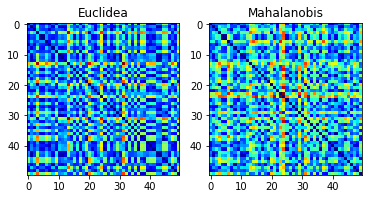

In [80]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Ma_euclidea, cmap='jet')
ax[0].set_title('Euclidea')
ax[1].imshow(Ma_mahalanobis, cmap='jet')
ax[1].set_title('Mahalanobis')

Hasta ahora hemos visto todo disimilitudes (distancias). ¿Y si quisiéramos una medida de similitud?

Una de las formas más sencillas es la siguiente:

Text(0.5, 1.0, 'Mahalanobis')

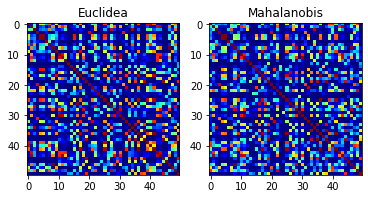

In [82]:
def matriz_similitud(X, distancia, C, mC=None):
    if mC is not None:
        mD = matriz_distancias(X, distancia, mC)
    else:
        mD = matriz_distancias(X, distancia)
    # P7
    return np.exp(-mD**2/C)

S_euclidiana = matriz_similitud(X, distancia_euclidiana, 1)
S_mahalanobis = matriz_similitud(X, distancia_mahalanobis, 1, mC)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(S_euclidiana, cmap='jet')
ax[0].set_title('Euclidea')
ax[1].imshow(S_mahalanobis, cmap='jet')
ax[1].set_title('Mahalanobis')

### Normalización, estandarización y distancia de Mahalanobis

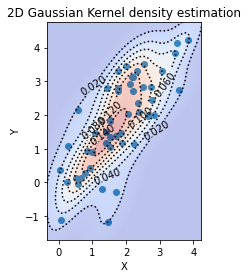

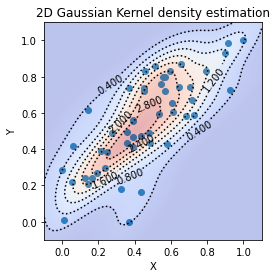

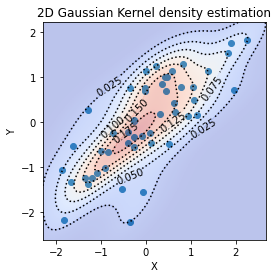

In [83]:
data_var_1b_norm = (data_var_1b - np.min(data_var_1b)) / (np.max(data_var_1b) - np.min(data_var_1b))
data_var_2b_norm = (data_var_2b - np.min(data_var_2b)) / (np.max(data_var_2b) - np.min(data_var_2b))
data_var_1b_stand = (data_var_1b - np.mean(data_var_1b)) / np.std(data_var_1b)
data_var_2b_stand = (data_var_2b - np.mean(data_var_2b)) / np.std(data_var_2b)
visualize_dataset(data_var_1b, data_var_2b, plot_centers=False)
visualize_dataset(data_var_1b_norm, data_var_2b_norm, plot_centers=False)
visualize_dataset(data_var_1b_stand, data_var_2b_stand, plot_centers=False)

Como podéis comprobar, la normalización y la estandarización "comprimen" los datos a un determinado rango. En el caso de la normalización, este rango es de 0 a 1. En el caso de la estandarización, no existe un rango definido, ya que dependerá de las desviaciones estándar de las variables.

Por lo tanto, queda visto que ni la normalización ni la estandarización eliminan las correlaciones entre variables, por lo que las distancias que tienen en cuenta las distribuciones de los datos siguen sindo útiles en estos casos. 

Es decir, siempre que tengamos un conjunto de datos en el que se cumplan una o ambas de las siguientes condiciones:

- las diferentes variables tengan distinto peso

- las variables no sean independientes

Preferiremos utilizar la distancia de Mahalanobis, la cual utiliza la matriz de covarianzas para tener en cuenta dicho peso o dependencia entre variables.

### Implementaciones en librerías de Python

Por último, cabe señalar que todas estas funciones ya están normalmente implementadas en distintos paquetes de Python, por lo que no es necesario que nos calentemos la cabeza.

Por ejemplo, en `scipy.spatial.distance` tenemos disponibles las distancias `minkowski, mahalanobis, jaccard, hamming, euclidean, cosine`, entre otras.

# Medidas de evaluación

In [ ]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

np.random.seed(19) # Fijamos una semilla para asegurar la reproducibilidad de la práctica

data_file_url = 'https://raw.githubusercontent.com/flifuehu/viu-unsupervised-learning/master/datasets/sinteticos/dataset_dos_guassianas.csv'
D = np.array(pd.read_csv(data_file_url))
D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[:150,0:2]
Dy = D[:150,2]

fig, ax = plt.subplots()
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

In [ ]:
# Inicializar el método
agrup = KMeans(n_clusters=4)
# Aprender el agrupamiento
agrup = agrup.fit(Dx)
# Obtener la pertenencia de las instancias a los clústeres
Dyp = agrup.predict(Dx)
# Obtener los centroides de los clústeres
cDx = agrup.cluster_centers_

### Medidas de evaluación extrínseca

Empezamos por obtener la matriz de confusión, que nos dice el número de coincidencias (intersección; número de ejemplos que aparecen en cierto clúster real y cierto clúster obtenido). Esta matriz nos permitirá construir las diferentes métricas de manera sencilla:

In [ ]:
# vamos a examinar la agrupación real de los datos
Dy

In [ ]:
# y ahora la realizada por nuestro algoritmo de clustering
Dyp

In [ ]:
# ¿cuantos clusters existen realmente?
np.unique(Dy)

In [ ]:
# ¿cuántos clusters dice nuestro algoritmo que ha encontrado?
np.unique(Dyp)

Y ahora la matriz de confusión:

In [ ]:
# implementamos una función que calcule la matriz de confusión
def matriz_confusion(cat_real, cat_pred):
    cats = np.unique(cat_real)
    clusts = np.unique(cat_pred)

    mat_conf = np.zeros((cats.size, clusts.size), dtype=int)
    for i in np.arange(cats.size):
        for j in np.arange(clusts.size):
            # predictedIJ almacena para cada grupo real cats[i], que coincidencias tiene con el grupo predicho clusts[j]
            # P8
            predictedIJ = ## P8. Tu código aquí ##
            mat_conf[i, j] = np.sum(predictedIJ)
    return mat_conf

In [ ]:
mat_conf = matriz_confusion(Dy, Dyp)
print(mat_conf)

In [ ]:
# Vamos a comprobar que lo hemos hecho bien
from sklearn.metrics import cluster
print(cluster.contingency_matrix(Dy, Dyp))

Fijaos que de acuerdo a esta matriz, nuestro algoritmo ha sido un fracaso. Sin embargo, recordad que en clustering, a diferencia de clasificación, no existen *clases*, sino solo grupos.

Por lo tanto, aunque nuestro algoritmo de clustering haya dicho que ha encontrado 10 "clase 0" y 0 "clase 1", si cambiamos los "nombres" de los grupos predichos, podríamos tener una matriz así:



In [ ]:
mat_conf[:, [1, 2, 0, 3 ]]

Fijaos que ahora tiene mejor pinta, ¿verdad? Es importante que entendáis una vez hecho el clustering no podemos comparar el resultado con nuestro agrupamiento real tal cual, sino que tenemos que mirar la correspondencia entre grupos.

Vamos a ver las medidas de evaluación extrínsecas explicadas en clase:

In [ ]:
def medida_error(mat):
    maxs = np.zeros(mat.shape[0])
    for l in np.arange(mat.shape[0]):
        maxs[l] = np.max(mat[l, :])
    maxs = np.sum(maxs)
    # P9
    return ## P9. Tu código aquí ##

def medida_pureza(mat):
    totales = np.sum(mat, 0) / np.sum(mat)
    max_precision_kl = np.zeros(mat.shape[1])
    for k in np.arange(mat.shape[1]):
        # P10
        max_precision_kl[k] = ## P10. Tu código aquí ##
    return np.sum(max_precision_kl)

def medida_precision(mat, l, k):
    # P11
    return ## P11. Tu código aquí ##

def medida_recall(mat, l, k):
    # P12
    return ## P12. Tu código aquí ##

def medida_f1_especifica(mat, l, k):
    prec = medida_precision(mat, l, k)
    rec = medida_recall(mat, l, k)
    if (prec+rec)==0:
        return 0
    else:
        # P13
        return ## P13. Tu código aquí ##

def medida_f1(mat):
    totales = np.sum(mat, 1) / np.sum(mat)
    f1 = np.zeros(mat.shape)
    for l in np.arange(mat.shape[0]):
        for k in np.arange(mat.shape[1]):
            f1[l, k] = medida_f1_especifica(mat, l, k)
    # P14
    f1 = ## P14. Tu código aquí ##
    return f1

mE = medida_error(mat_conf)
mP = medida_pureza(mat_conf)
mF1 = medida_f1(mat_conf)

print(f'El valor del error cometido es = {mE}')
print(f'La pureza del agrupamiento obtenido es = {mP}')
print(f'El valor F1 es = {mF1}')

De todas formas, tener el agrupamiento real de un clustering es tremendamente raro. Así que las medidas de evaluación que usaremos serán las intrínsecas, que como hemos visto en clase, se basan en las distancias intra- e inter- cluster.

Todas las medidas usadas comunmente se encuentran ya implementadas en python:

In [ ]:
# listado completo: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
# ejemplos de las más comunes: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

from sklearn.metrics import cluster
print('Completness score =', cluster.completeness_score(Dy, Dyp))
print('Homogeneidad =', cluster.homogeneity_score(Dy, Dyp))
print('Información mutua (ajustada) =', cluster.adjusted_mutual_info_score(Dy, Dyp))

In [ ]:
# medida de la silueta
mC = np.cov(Dx.transpose())
Ma_mahalanobis = matriz_distancias(Dx, distancia_mahalanobis, mC)
print(cluster.silhouette_score(Ma_mahalanobis, Dy))

In [ ]:
# medida Calinski-Harabasz
print('Índice de Calinski-Harabasz =', cluster.calinski_harabasz_score(Ma_mahalanobis, Dy))

In [ ]:
# medida Davies-Bouldin (mejor cuanto más próximo a 0)
print('Índice de Davies-Buildin =', cluster.davies_bouldin_score(Ma_mahalanobis, Dy))